In [44]:
import pandas as pd
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('validated_data.csv')
df.head()

,Product_ID,Product_Name,Calories,Carbs,Sugars,Fat,Protein,Sodium,Serving_Size,Health_Condition,Height,Weight,Age,BMI,Activity_Level,Blood_Sugar_Level,Blood_Pressure,Health_Compatibility_Score,Health_Risk
0,P16601,bring Product,289.56,49.71,22.12,19.29,18.38,1460.70,214.09,Diabetic,170.63,57.14,50,19.625894,High,174.127264,104.386695,41.185211,High
1,P27319,reason Product,247.07,49.49,19.57,35.00,8.48,195.36,178.19,Obese,166.86,94.59,74,33.973536,Medium,119.959580,150.729833,49.392329,High
2,P20205,wall Product,209.52,68.09,15.72,27.70,15.92,1043.50,128.07,Heart Disease,164.64,47.37,71,17.475623,High,96.220791,137.230824,77.661754,Low
3,P78943,general Product,217.64,46.73,17.72,9.15,19.40,931.10,160.60,Diabetic,178.02,55.07,40,17.377107,Medium,203.874283,101.538758,58.170785,Medium
4,P77959,north Product,172.89,51.32,18.41,10.63,24.06,945.32,115.60,Heart Disease,179.98,50.96,69,15.731891,Medium,93.636305,164.162647,85.794018,Low


In [46]:
df = df.drop(columns=['Product_ID', 'Product_Name', 'Health_Risk'])
df['Health_Condition'] = df['Health_Condition'].map({'Diabetic': 0, 'Obese': 1, 'Heart Disease': 2, 'Healthy': 3, 'Hypertension': 4})
df['Activity_Level'] = df['Activity_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})


In [47]:
df.head()

,Calories,Carbs,Sugars,Fat,Protein,Sodium,Serving_Size,Health_Condition,Height,Weight,Age,BMI,Activity_Level,Blood_Sugar_Level,Blood_Pressure,Health_Compatibility_Score
0,289.56,49.71,22.12,19.29,18.38,1460.70,214.09,0,170.63,57.14,50,19.625894,2,174.127264,104.386695,41.185211
1,247.07,49.49,19.57,35.00,8.48,195.36,178.19,1,166.86,94.59,74,33.973536,1,119.959580,150.729833,49.392329
2,209.52,68.09,15.72,27.70,15.92,1043.50,128.07,2,164.64,47.37,71,17.475623,2,96.220791,137.230824,77.661754
3,217.64,46.73,17.72,9.15,19.40,931.10,160.60,0,178.02,55.07,40,17.377107,1,203.874283,101.538758,58.170785
4,172.89,51.32,18.41,10.63,24.06,945.32,115.60,2,179.98,50.96,69,15.731891,1,93.636305,164.162647,85.794018


In [48]:
X = df.drop(columns=['Health_Compatibility_Score'])
y = df['Health_Compatibility_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='linear', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='linear'),
    tf.keras.layers.Dense(64, activation='linear'),
    tf.keras.layers.Dense(128, activation='linear'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_absolute_error')

In [50]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
1111/1111 [==============================] - 3s 2ms/step - loss: 9.8387
Epoch 2/100
1111/1111 [==============================] - 3s 2ms/step - loss: 5.7932
Epoch 3/100
1111/1111 [==============================] - 2s 2ms/step - loss: 5.2197
Epoch 4/100
1111/1111 [==============================] - 2s 2ms/step - loss: 4.9103
Epoch 5/100
1111/1111 [==============================] - 2s 2ms/step - loss: 4.8152
Epoch 6/100
1111/1111 [==============================] - 2s 2ms/step - loss: 4.8510
Epoch 7/100
1111/1111 [==============================] - 2s 2ms/step - loss: 4.6741
Epoch 8/100
1111/1111 [==============================] - 2s 2ms/step - loss: 4.6413
Epoch 9/100
1111/1111 [==============================] - 2s 2ms/step - loss: 4.6025
Epoch 10/100
1111/1111 [==============================] - 2s 2ms/step - loss: 4.4764
Epoch 11/100
1111/1111 [==============================] - 2s 2ms/step - loss: 4.5047
Epoch 12/100
1111/1111 [==============================] - 2s 2ms/step - lo

In [ ]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")


278/278 [==============================] - 1s 2ms/step - loss: 4.0866
Test Loss (MSE): 4.086626052856445


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


278/278 [==============================] - 1s 1ms/step
Mean Squared Error (MSE): 25.377711666809855
Root Mean Squared Error (RMSE): 5.03762956824039
Mean Absolute Error (MAE): 4.08662805574685
R-squared (R²): 0.8910499512234048


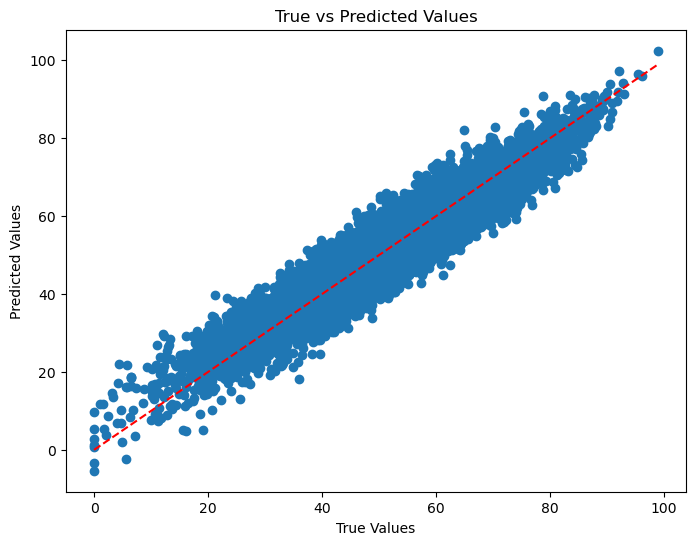

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # line of perfect prediction
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()


In [60]:
model.save('models/health_compatibility.h5')